In [126]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

In [127]:
# Set device
device = torch.device('cuda') ; print(device)            # if torch.cuda.is_available() else 'cpu')

# Hyperparameters
# input_size= 100*100
num_classes = 16
learning_rate = 0.001
batch_size = 32
num_epochs = 40


cuda


In [129]:
transform = transforms.Compose([
    transforms.Resize((100,100)),
    transforms.ToTensor(),
    #transforms.Grayscale(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [130]:
train_dataset = datasets.ImageFolder(root='/home/abir/Documents/sig_pro/wavelet scalogram work/Training_set', transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

test_dataset_1 = datasets.ImageFolder(root='/home/abir/Documents/sig_pro/wavelet scalogram work/Testing_set', transform=transform)
test_loader_1 = DataLoader(dataset=test_dataset_1, batch_size=batch_size, shuffle=False)

val_dataset=datasets.ImageFolder(root='/home/abir/Documents/sig_pro/wavelet scalogram work/validation_set', transform=transform)
val_loader=DataLoader(dataset=val_dataset,batch_size=batch_size, shuffle=False)

In [131]:
print(len(test_dataset_1),'\n',len(test_loader_1))
print(len(val_dataset),'\n',len(val_loader))

# test=val_loader[50]
# print(test.shape)

800 
 25
798 
 25


In [132]:
model=torchvision.models.mobilenet_v2(pretrained=True)
# model.classifier[1]=nn.Linear(model.classifier[1].in_features,16) 
# 
for param in model.parameters():
    param.requires_grad = False


model.Classifier=nn.Sequential(nn.Linear(model.last_channel,256),
                               nn.ReLU(),
                               nn.Linear(256,128),
                               nn.ReLU(),
                               nn.Linear(128,64),
                               nn.ReLU(),
                               nn.Linear(64,32),
                               nn.ReLU(),
                               nn.Linear(32,16),
                               )

for param in model.classifier.parameters():
    param.requires_grad = True


# print(model)

/home/abir/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/abir/miniconda3/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [133]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
model=model.to(device)

In [134]:
classes=train_dataset.classes
cls=train_dataset.class_to_idx
print(classes,"\n",cls)

['Flicker', 'Harmonics', 'Harmonics + Sag + Flicker', 'Harmonics + Swell + Flicker', 'Impulsive Transient', 'Momentory Interruption', 'Oscillatory Transient', 'Sag + Flicker', 'Sag + Harmonics', 'Sag + harmonics + Impulsive Transient', 'Swell + Flicker', 'Swell + Harmonics', 'Swell + harmonics + Impulsive Transient', 'Volatge Sag', 'Voltage Swell', 'pure signal'] 
 {'Flicker': 0, 'Harmonics': 1, 'Harmonics + Sag + Flicker': 2, 'Harmonics + Swell + Flicker': 3, 'Impulsive Transient': 4, 'Momentory Interruption': 5, 'Oscillatory Transient': 6, 'Sag + Flicker': 7, 'Sag + Harmonics': 8, 'Sag + harmonics + Impulsive Transient': 9, 'Swell + Flicker': 10, 'Swell + Harmonics': 11, 'Swell + harmonics + Impulsive Transient': 12, 'Volatge Sag': 13, 'Voltage Swell': 14, 'pure signal': 15}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


4609 Swell + Harmonics
3488 Sag + Harmonics
3109 Sag + Flicker
1680 Impulsive Transient


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


545 Harmonics
3750 Sag + harmonics + Impulsive Transient


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


2406 Oscillatory Transient
363 Flicker


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


2753 Oscillatory Transient


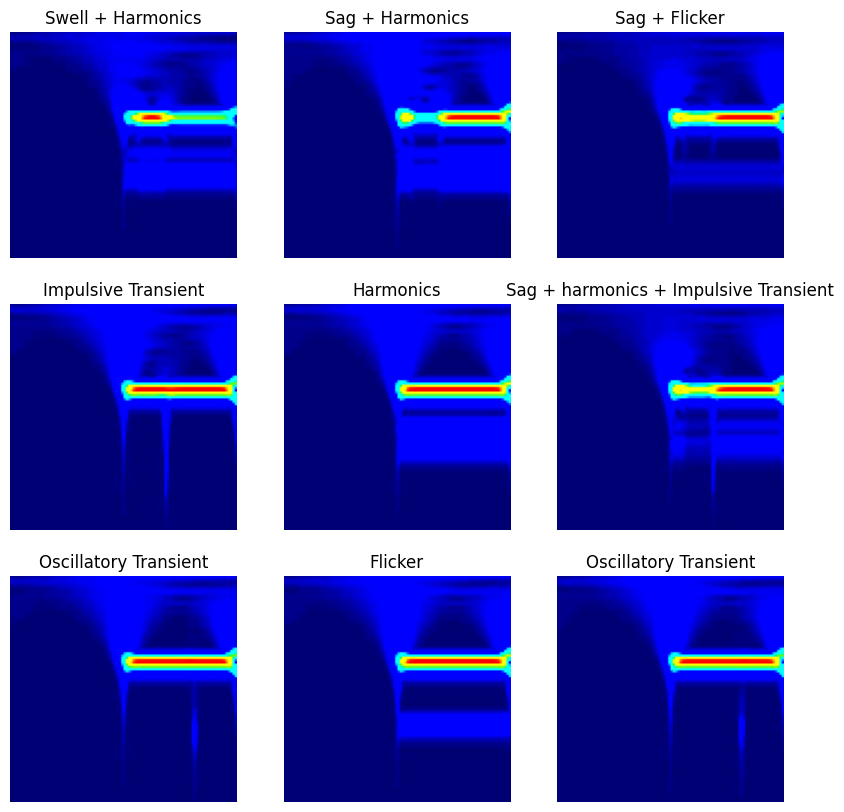

In [135]:
fig = plt.figure(figsize=(10,10))
rows,cols =3,3
for i in range (1,rows*cols+1):
    rand_img=torch.randint(0,len(train_dataset), size=[1]).item()
    # ind_tar=rand_img.targets
    testt_img,label=train_dataset[rand_img]
    print(rand_img,classes[label])
    fig.add_subplot(rows,cols,i)
    plt.title(classes[label])
    plt.axis(False)
    immg=np.asarray(testt_img)
    img_grid = np.moveaxis(immg,0,-1)
    
    plt.imshow(img_grid)
    plt.savefig('scalogram images from training dataset--')

In [136]:
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

In [137]:

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    # Training
    model.train()
    train_loss = 0
    correct = 0
    total = 0
    
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        
        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_loss /= len(train_loader)
    train_accuracy = 100 * correct / total
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
# print(f"eppoch:{epoch} | training accuracy:{train_accuracy} | training_loss:{train_loss}")
    model.eval()
    val_loss = 0
    val_correct = 0
    val_total = 0
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for val_images, val_labels in test_loader_1:
            val_images = val_images.to(device)
            val_labels = val_labels.to(device)
            val_outputs = model(val_images)
            val_loss = criterion(val_outputs, val_labels)
            
            val_loss += val_loss.item()
            _, val_predicted = torch.max(val_outputs.data, 1)
            val_total += val_labels.size(0)
            val_correct += (val_predicted == val_labels).sum().item()
            
            all_labels .extend(val_labels.cpu().numpy())
            all_predictions.extend(val_predicted.cpu().numpy())

    val_loss /= len(test_loader_1)
   
    val_accuracy = 100 * val_correct / val_total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
        
    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.2f}%')

Epoch [1/40], Train Loss: 7.9547, Train Accuracy: 2.94%, Val Loss: 0.2506, Val Accuracy: 14.00%
Epoch [2/40], Train Loss: 3.4447, Train Accuracy: 29.97%, Val Loss: 0.0673, Val Accuracy: 49.75%
Epoch [3/40], Train Loss: 1.7611, Train Accuracy: 55.42%, Val Loss: 0.0223, Val Accuracy: 69.38%
Epoch [4/40], Train Loss: 1.1239, Train Accuracy: 69.53%, Val Loss: 0.0122, Val Accuracy: 80.75%
Epoch [5/40], Train Loss: 0.7849, Train Accuracy: 79.58%, Val Loss: 0.0075, Val Accuracy: 86.38%
Epoch [6/40], Train Loss: 0.6210, Train Accuracy: 83.75%, Val Loss: 0.0083, Val Accuracy: 90.50%
Epoch [7/40], Train Loss: 0.5134, Train Accuracy: 86.39%, Val Loss: 0.0023, Val Accuracy: 91.12%
Epoch [8/40], Train Loss: 0.4412, Train Accuracy: 88.38%, Val Loss: 0.0024, Val Accuracy: 92.38%
Epoch [9/40], Train Loss: 0.3762, Train Accuracy: 89.91%, Val Loss: 0.0022, Val Accuracy: 93.62%
Epoch [10/40], Train Loss: 0.3460, Train Accuracy: 90.61%, Val Loss: 0.0016, Val Accuracy: 93.50%
Epoch [11/40], Train Loss: 0.3

In [111]:
# val_loss=val_loss.cpu().numpy()

In [138]:
all_val_labels=[]
all_val_predictions=[]
all_val_label=all_labels
all_val_predictions=all_predictions

print(len(all_val_label),all_val_label)
print(len(all_val_predictions),all_val_predictions)

800 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,

In [139]:
print(len(val_losses),val_losses)
print(len(val_accuracies),val_accuracies)

print(len(train_accuracies),train_accuracies)
print(len(train_losses),train_losses)

40 [tensor(0.2506, device='cuda:0'), tensor(0.0673, device='cuda:0'), tensor(0.0223, device='cuda:0'), tensor(0.0122, device='cuda:0'), tensor(0.0075, device='cuda:0'), tensor(0.0083, device='cuda:0'), tensor(0.0023, device='cuda:0'), tensor(0.0024, device='cuda:0'), tensor(0.0022, device='cuda:0'), tensor(0.0016, device='cuda:0'), tensor(0.0020, device='cuda:0'), tensor(0.0015, device='cuda:0'), tensor(0.0016, device='cuda:0'), tensor(0.0011, device='cuda:0'), tensor(0.0010, device='cuda:0'), tensor(0.0014, device='cuda:0'), tensor(0.0005, device='cuda:0'), tensor(0.0008, device='cuda:0'), tensor(0.0011, device='cuda:0'), tensor(0.0004, device='cuda:0'), tensor(0.0007, device='cuda:0'), tensor(0.0006, device='cuda:0'), tensor(0.0008, device='cuda:0'), tensor(0.0005, device='cuda:0'), tensor(0.0005, device='cuda:0'), tensor(0.0005, device='cuda:0'), tensor(0.0003, device='cuda:0'), tensor(0.0007, device='cuda:0'), tensor(0.0005, device='cuda:0'), tensor(0.0004, device='cuda:0'), tensor

In [140]:
np_val_loss=np.array([t.cpu().numpy() for t in val_losses])
# for i in range(len(val_losses)):

#     np.nump=i.cpu().numpy()
#     np_val_loss.append(np.nump)

print(np_val_loss)

[2.5062343e-01 6.7336574e-02 2.2287393e-02 1.2153266e-02 7.4524446e-03
 8.3143450e-03 2.2921341e-03 2.3948825e-03 2.2253117e-03 1.6447058e-03
 2.0409145e-03 1.4710280e-03 1.5688051e-03 1.1363593e-03 1.0229610e-03
 1.4465270e-03 4.8634224e-04 8.1340014e-04 1.1039465e-03 3.7629026e-04
 7.3426630e-04 5.5091199e-04 7.7547139e-04 5.0152396e-04 5.2810635e-04
 5.3451688e-04 3.2649029e-04 7.2916737e-04 4.6416558e-04 4.2561500e-04
 4.5691687e-04 2.5666438e-04 4.4087946e-04 2.4115690e-04 4.2096397e-04
 3.4072093e-04 2.0440918e-04 3.0554403e-04 2.2040757e-04 1.7235888e-04]


In [141]:


torch.save(model.state_dict(),'sig_mob_nw_freeze-40.pth')

model.load_state_dict(torch.load('sig_mob_nw_freeze-40.pth'))

<All keys matched successfully>

In [142]:
print(len(val_dataset),len(val_loader))

798 25


In [143]:
model.eval()
model=model.to(device)

pre_out=[]
exe_lbl=[]

# for epoch in range(num_epochs):
with torch.no_grad():
    # for i in range(len(val_dataset)):
    # con_img=transform(i)

    for images,label in val_loader:
        images=images.to(device)
        label=label.to(device)

        result=model(images)
        _, tr_val_predicted = torch.max(result.data, 1)
        
        pre_out.extend(tr_val_predicted.cpu().numpy())
        exe_lbl.extend(label.cpu().numpy())


print(len(pre_out),pre_out)

print(len(exe_lbl),exe_lbl)
        

798 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 2, 2, 2, 8, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 11, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6

In [118]:
print(len(pre_out),pre_out)
print(len(exe_lbl),exe_lbl)
# print_confusion_matrix()

768 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 8, 2, 2, 2, 8, 2, 2, 2, 2, 2, 2, 2, 7, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 11, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6

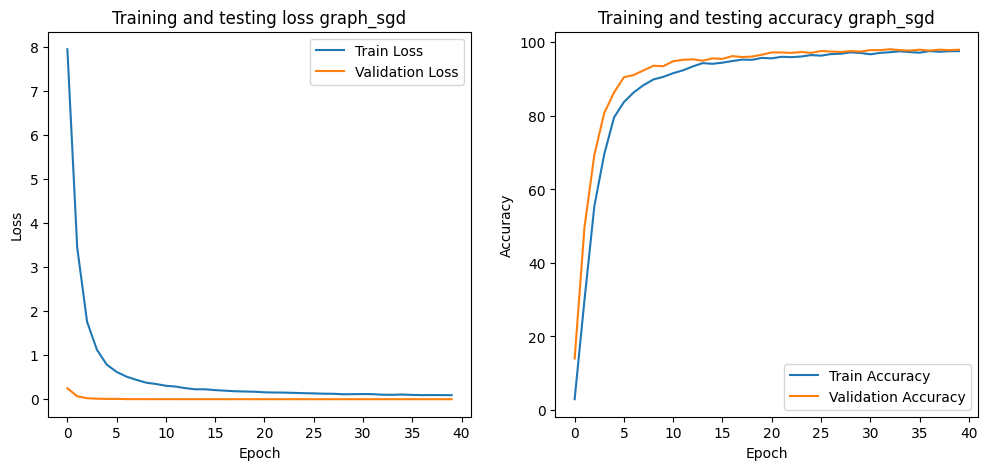

In [145]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(np_val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and testing loss graph_sgd')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and testing accuracy graph_sgd')
plt.savefig('graph---sgd---freeze-40')
plt.show()

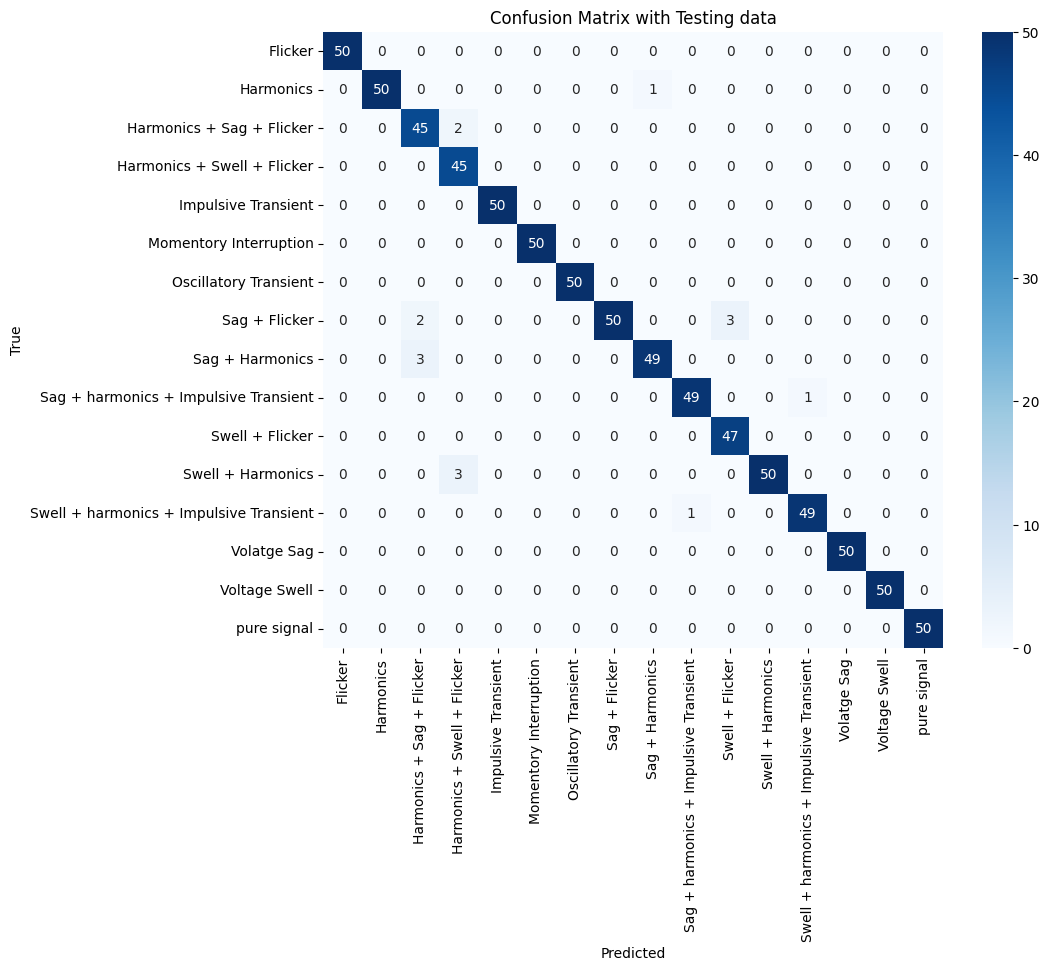

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.98      0.99        51
           2       0.90      0.96      0.93        47
           3       0.90      1.00      0.95        45
           4       1.00      1.00      1.00        50
           5       1.00      1.00      1.00        50
           6       1.00      1.00      1.00        50
           7       1.00      0.91      0.95        55
           8       0.98      0.94      0.96        52
           9       0.98      0.98      0.98        50
          10       0.94      1.00      0.97        47
          11       1.00      0.94      0.97        53
          12       0.98      0.98      0.98        50
          13       1.00      1.00      1.00        50
          14       1.00      1.00      1.00        50
          15       1.00      1.00      1.00        50

    accuracy                           0.98       800
  

In [148]:
conf_matrix = confusion_matrix(all_predictions,all_labels)                              # (pre_out,exe_lbl)
class_report = classification_report(all_predictions,all_labels, target_names=[str(i) for i in range(num_classes)])

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset_1.classes, yticklabels=test_dataset_1.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix with Testing data')
plt.savefig('model validation_sgd---40-freeze-test')
plt.show()

print("Classification Report:\n", class_report)

In [121]:
print(cls)

{'Flicker': 0, 'Harmonics': 1, 'Harmonics + Sag + Flicker': 2, 'Harmonics + Swell + Flicker': 3, 'Impulsive Transient': 4, 'Momentory Interruption': 5, 'Oscillatory Transient': 6, 'Sag + Flicker': 7, 'Sag + Harmonics': 8, 'Sag + harmonics + Impulsive Transient': 9, 'Swell + Flicker': 10, 'Swell + Harmonics': 11, 'Swell + harmonics + Impulsive Transient': 12, 'Volatge Sag': 13, 'Voltage Swell': 14, 'pure signal': 15}


In [122]:
# MANUAL TESTING 

from PIL import Image

# image=torch.randint(0,len(test_dataset), size=[1]).item()

# for i in range (len(test_dataset)):
# Aimage,labl=test_dataset[image]
# print(f"Truth value:{classes_of_val[labl]}")
image = Image.open('/home/abir/Documents/sig_pro/wavelet scalogram work/unseen/Sag + Flicker/Sag_Flicker_images_2/Sag_Flicker_022.jpg')
image=transform(image)
image=image.to(device)

# tra_image.cuda();print(tra_image)
image=image.unsqueeze(0)
# print(image.shape)


with torch.no_grad():

    output=model(image)
    fn_opt=torch.max(output,1)

    print(output)
    # if labl==indices
    print(fn_opt)



tensor([[ 9.5514e+00,  5.6789e+00,  6.8569e+00,  7.1065e+00,  5.8530e+00,
          5.1737e+00,  6.9411e+00,  1.3019e+01,  4.8991e+00,  5.3382e+00,
          9.2659e+00,  5.1717e+00,  5.0990e+00,  5.9617e+00,  3.4033e+00,
          4.1667e+00, -6.8083e-01, -1.7838e+00, -5.2320e-01,  2.2260e-02,
         -3.4346e+00, -1.4383e+00, -6.7294e-01, -1.5891e-01, -9.0243e-01,
          2.6328e-01, -2.2374e+00, -1.8334e+00, -1.5577e+00,  1.0826e+00,
         -5.8641e-02, -2.6205e-01, -9.9997e-01, -2.6919e-01,  1.0293e+00,
         -1.0007e+00, -1.2337e-01, -3.2298e-01, -4.4046e+00, -3.9334e-01,
          6.2751e-01, -2.1088e+00, -2.7567e+00, -2.7349e+00, -2.1264e+00,
         -2.8322e-01,  3.8948e-01, -1.3815e+00, -6.2180e-01, -2.1703e+00,
          1.6029e+00, -1.1479e+00, -2.3962e-01, -1.7617e+00, -2.0551e+00,
          6.1808e-01, -3.4765e+00, -1.9000e+00, -6.2742e-01,  7.3809e-01,
          1.2863e+00, -1.0681e+00, -4.5976e-01, -1.5717e+00, -5.2026e-01,
         -9.0600e-01, -1.7311e+00, -1.